# Face Recognition

### *Importar bibliotecas*
Primero que nada, es necesario importar las bibliotecas que seran usadas, las cuales son: 
- cv2 - OpenCV
- os - Biblioteca para la lectura en directorios
- numpy - Biblioteca para calculos numéricos
- matplotlib - Biblioteca para graficación

In [37]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

### *Definir etiquetas y directorios*

La base de datos estará etiquetada con carpetas con un número asigado. Sin embargo, cada número corresponde al nombre de una persona. En el siguiente código se relaciona el número de la carpeta con el nombre real de la persona.

In [38]:
subjects = ["", "Marco", "Antonio", "Alan", "Luis"]

testDataFolderPath = "./database/testData/"
trainingDataFolderPath = "./database/trainData"

### *Detectar rostros*
Esta funcion recibe una imagen a color, que la pasa a covenrtir a escala de grises, luego se lee el modelo clasificador  _face-cascade_ que es para detectar rostros frontales y se utiliza para detectar los rostros de la imagen, si se detecta un rostro regresa las coordenadas del rectangulo donde se encuentra, y si no regresa la imagen original.

In [39]:
def detectFace(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

    if (len(faces) == 0):
        return None, None
    
    (x, y, w, h) = faces[0]

    return gray[y:y+w, x:x+h], faces[0]

### *Lectura y preparación de los datos para su entrenamiento*

Se define la función prepare_training_data. Esta función recibe la dirección que indica la ruta en donde se encuentran las imagenes de entrenamiento.
La función lee todas las carpetas contenidas (s1,s2,..,sn) y recorre dentro de cada carpeta buscando las imagenes y utiliza la función detect_face para encontrar el rectángulos en donde está el rostro. Si existe un rostro en la imagen entonces se agrega a una lista de rostros y una lista que lleva seguimiento de las etiquetas labels.


In [40]:
def prepareTrainingData(dataFolderPath):

    dirs = os.listdir(dataFolderPath)

    faces = []

    labels = []

    for dirName in dirs:
        if not dirName.startswith("s"):
            continue

        label = int(dirName.replace("s", ""))

        subjectDirPath = dataFolderPath + "/" + dirName

        subjectImagesName = os.listdir(subjectDirPath)

        for imageName in subjectImagesName:

            if imageName.startswith("."):
                continue

            imagePath = subjectDirPath + "/" + imageName

            image = cv2.imread(imagePath)

            face, rect = detectFace(image)

            if face is not None:
                faces.append(face)
                labels.append(label)

    return faces, labels

Llamamos a la funcion que prepara los datos y le pasamos como parametro la ruta donde se encuentran las imagenes de entrenamiento

In [41]:
print("Preparando datos. . .")
faces, labels = prepareTrainingData(trainingDataFolderPath)
print("Datos preparados")

print("Total Faces: ", len(faces))
print("Total lables ", len(labels))

Preparando datos. . .
Datos preparados
Total Faces:  18
Total lables  18


#### Reconocimiento de rostros

Se elige el algoritmo a utlizar, en nuestro caso LBPHFaceRecognizer, y luego se entrena usando el faceRecognizer elegido y como parametro la lista con los rostros y etiquetas obtenidas cuando preparamos los datos 

In [42]:
#LBPHFaceRecognizer
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

face_recognizer.train(faces, np.array(labels))

#### Dibujar las regiones con rostro

draw_rectangle nos ayudarán a dibujar un rectángulo sobre la imagen original en donde indique en que parte de la imagen se encuentra el rostro y draw_text nos va a colocar el nombre del sujeto que se predijo.

In [43]:
def drawRectangle(img, rect):
    (x,y,w,h) = rect
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

def drawText(img, text, x, y):
    cv2.putText(img, text,(x, y), cv2.FONT_HERSHEY_PLAIN, 1.5 , (0, 255, 0) , 2)

#### Prediccion

La siguiente funcion es la que lleva a cabo la prediccion, recibe como parametro una imagen y detecta la cara con la funcion detect_face, luego predice a que etiqueta pertenece y obtiene el nombre predicho, luego dibuja un rectangulo y el nombre sobre la imagen

In [44]:
def predict(testImg):
    img = testImg.copy()

    face, rect = detectFace(img)

    if face is not None:
        (label, confidence) = face_recognizer.predict(face)
        labelText = subjects[label]
        drawRectangle(img, rect)
        drawText(img, labelText, rect[0], rect[1]-5)
    else:
        print("No face detected in the image.")
        drawText(img, "No face detected", 15, 20)

    return img

A continuacion se prueba todo el codigo.

1. Lee todos los directorios en la carpeta de datos de prueba.
2. Para cada directorio que comienza con "s", extrae la etiqueta y lee todas las imágenes en ese directorio.
3. Ignora las imágenes que comienzan con ".".
4. Para cada imagen válida, la lee y realiza una predicción.
5. Almacena cada predicción en una lista.
6. Finalmente, muestra cada imagen de predicción.

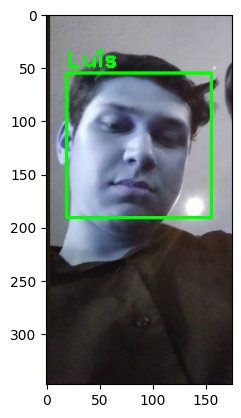

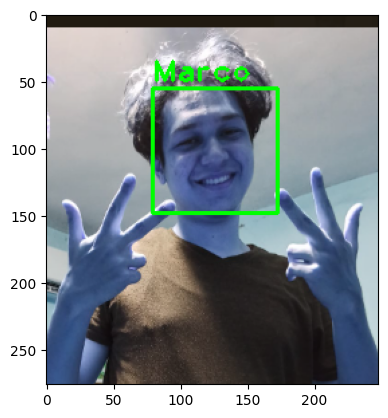

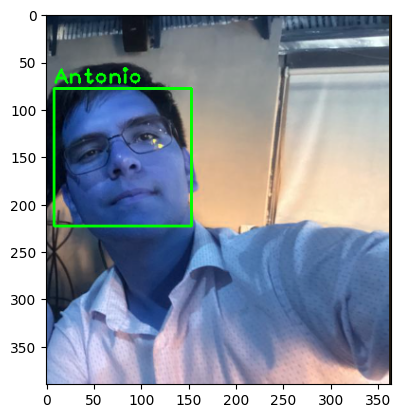

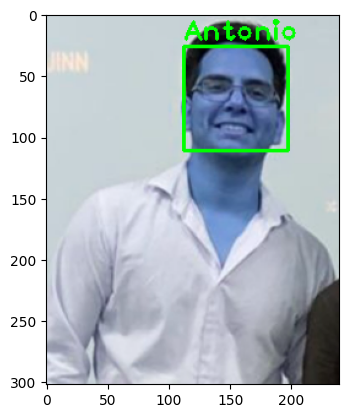

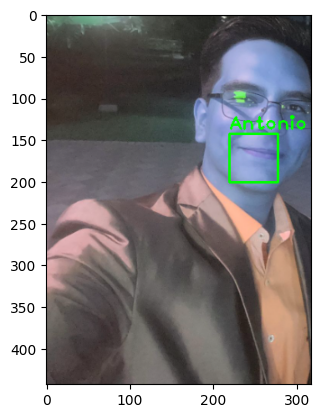

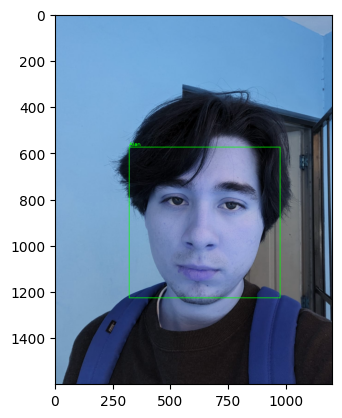

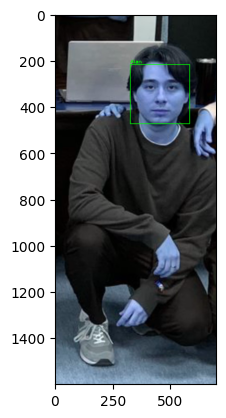

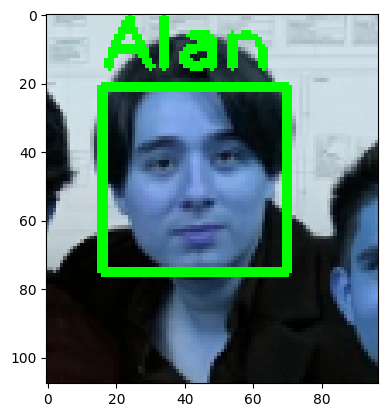

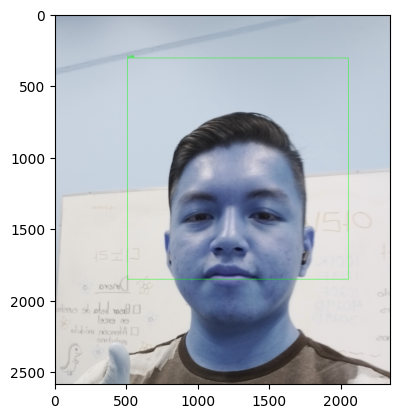

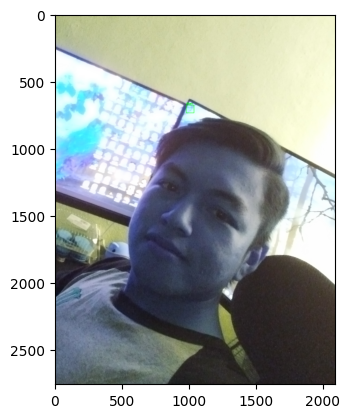

In [45]:
dirs = os.listdir(testDataFolderPath)

predictTestList = []

for dirName in dirs:
    if not dirName.startswith("s"):
        continue

    label = int(dirName.replace("s", ""))

    testDirPath = testDataFolderPath + "/" + dirName

    imgTestPath = os.listdir(testDirPath)

    for testImg in imgTestPath:

        if testImg.startswith("."):
            continue

        imagePath = testDirPath + "/" + testImg

        testImageRead = cv2.imread(imagePath)
        predictTest = predict(testImageRead)
        predictTestList.append(predictTest)


for predictResult in predictTestList:
        plt.imshow(predictResult)
        plt.show()